# MNIST Dataset

### Use Scikit learn library to fetch dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [2]:
 X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
X[250]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [6]:
y[250]

'3'

## Display the data

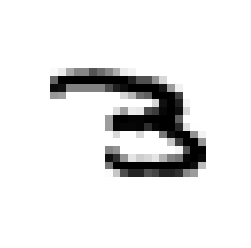

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def showImage(n):
    some_digit = X[n]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

showImage(250)

## Output to be predicted

In [8]:
y[250]

'3'

In [9]:
# Converting string to int

for i in range(0, len(y)): 
    y[i] = int(y[i]) 
y[250]

3

### Train & Test part

In [10]:
#Shuffling the data

import numpy as np
shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
print ('X_train shape', X_train.shape)
print ('y_train shape', y_train.shape)
print ('X_test shape', X_test.shape)
print ('y_test shape', y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


### Training a Binary Classifier

In [13]:
y_train_3 = (y_train == 3)#True for all 3s, False for all other digits
y_test_3 = (y_test == 3)

In [14]:
print ('X_train shape', X_train.shape)
print ('y_train_3 shape', y_train_3.shape)
print ('X_test shape', X_test.shape)
print ('y_test_3 shape', y_test_3.shape)

X_train shape (60000, 784)
y_train_3 shape (60000,)
X_test shape (10000, 784)
y_test_3 shape (10000,)


### Classifier

In [15]:
# Stochastic Gradient Descent (SGD) classifier
# capable of handling very large datasets efficiently & well suited for online learning

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

C:\Users\Sivadinesh\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

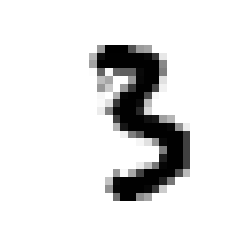

array([ True], dtype=bool)

In [31]:
k = 8
showImage(k)
sgd_clf.predict(X[k].reshape(1, -1))

### Confusion Matrix

In [32]:
training_score = sgd_clf.score(X_test, y_test_3)
print("training_score: "+str(training_score))

y_pred= sgd_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_3, y_pred)
print("Confusion Matrix: ")
print(cm)


training_score: 0.9563
Confusion Matrix: 
[[8823  227]
 [ 210  740]]


### Precision & Recall

In [33]:
from sklearn.metrics import classification_report
cr = classification_report(y_test_3, y_pred)

print("classification Report:")
print(cr)

classification Report:
              precision    recall  f1-score   support

       False       0.98      0.97      0.98      9050
        True       0.77      0.78      0.77       950

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.96      0.96      0.96     10000

